Lego Pricing Predictor using linear regression 
===

Started by importing the required packages and data set. The data set is created from a combination of other data sets that are located in the data folder. These data sets are sourced from online sources. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
df = pd.read_csv('data/LegoStatsHistorical.csv')

Linear Regression model on the data

Training R2 Score: 0.5328093079235063
Training MAE Score: 0.09347811926497417
Test R2 Score: 0.37238815799719827
Test MAE Score: 0.09692786541162277


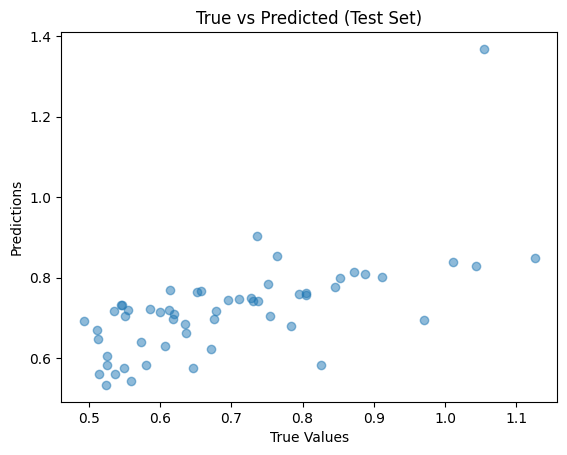

In [20]:

df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

df_model = df_encoded[['set_id', 'num_parts', 'num_figs', 'retail_price',
    'num_unique_figs', 'set_rating', 'pop_price', 
    'num_reviews', 'return']]

X = df_model.drop(['return'], axis=1)
y = df_model['return']

X = X.apply(pd.to_numeric, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Training MAE Score:", mean_absolute_error(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Test MAE Score:", mean_absolute_error(y_test, y_test_pred))

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted (Test Set)")
plt.show()


Cross-Validation R2 Score: 0.13743522492752228
Cross-Validation MAE Score: 0.0985893949714636


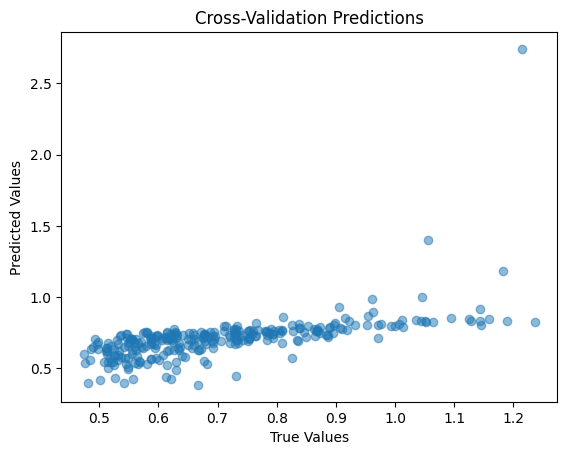

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, make_scorer, r2_score
import pandas as pd
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

df_model = df_encoded[['set_id', 'num_parts', 'num_figs', 'retail_price',
    'num_unique_figs', 'set_rating', 'pop_price', 
    'num_reviews', 'return']]

X = df_model.drop(['return'], axis=1)
y = df_model['return']

model = linear_model.LinearRegression()

cross_val_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Score:", cross_val_r2_scores.mean())

mae = make_scorer(mean_absolute_error, greater_is_better=False)
cross_val_mae_scores = cross_val_score(model, X, y, cv=5, scoring=mae)
print("Cross-Validation MAE Score:", -cross_val_mae_scores.mean())

predicted_y = cross_val_predict(model, X, y, cv=5)

plt.scatter(y, predicted_y, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Cross-Validation Predictions")
plt.show()


Training R2 Score: 0.3218909772531646
Training MAE Score: 0.11118272781463054
Test R2 Score: 0.2369040974429264
Test MAE Score: 0.10859767636305352


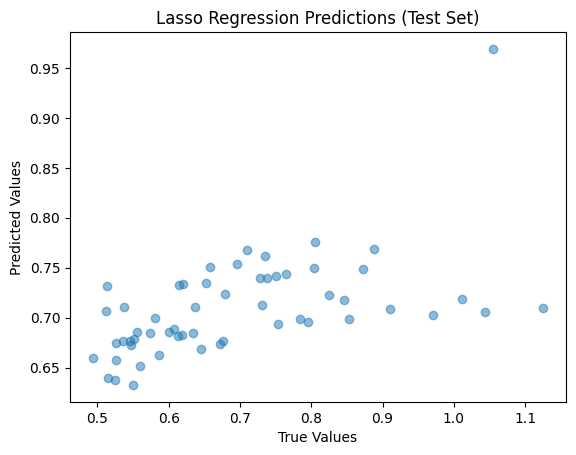

           Feature  Coefficient
6        pop_price     0.001091
1        num_parts     0.000003
4  num_unique_figs    -0.000000
2         num_figs    -0.000000
5       set_rating     0.000000
7      num_reviews    -0.000000
0           set_id    -0.000001
3     retail_price    -0.000847


In [22]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

df_model = df_encoded[['set_id', 'num_parts', 'num_figs', 'retail_price',
    'num_unique_figs', 'set_rating', 'pop_price', 
    'num_reviews', 'return']]

X = df_model.drop(['return'], axis=1)
y = df_model['return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Training R2 Score:", train_r2)
print("Training MAE Score:", train_mae)

y_test_pred = lasso.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test R2 Score:", test_r2)
print("Test MAE Score:", test_mae)

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression Predictions (Test Set)")
plt.show()

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)
